In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.column_transposition import *
from cipher.vigenere import *
from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
import re
import itertools

In [3]:
challenge_number = 9
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [19]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

rwa = wcat(cat(reversed(w)) for w in ca.split())
ra = cat(reversed(ca))
sca = sanitise(ca)
rsca = cat(reversed(sca))
pca = letters(ca)
pta = depunctuate(ca)

scb = cat(l for l in cb if l in "012")
gcb = cb.split()
rscb = cat(reversed(scb))

In [5]:
# open(plaintext_b_filename, 'w').write(lcat(tpack(segment(pa))))

In [6]:
len(scb)

18480

# Solution

In [45]:
def unquad(quadlet):
    ds = [int(c) for c in quadlet]
    return ds[0] * 12 + ds[1] * 6 + ds[2] * 2 + ds[3]

In [48]:
quads = [q for ch in chunks(scb, 28) for q in every_nth(ch, 7)]
quads[:10]

['1110',
 '1020',
 '1110',
 '0011',
 '1021',
 '0020',
 '0011',
 '1110',
 '1011',
 '0011']

In [57]:
qcb = cat(unpos(unquad(q)) for q in quads)
qcb[:100]

'uqudredupdatfvsunvdqijeqdrrfaqhdnghqghrcfsbhgwnaqgmghqugeqngpdatfvsadccnehqghgweqcfufvnemhqghfvsdrhb'

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


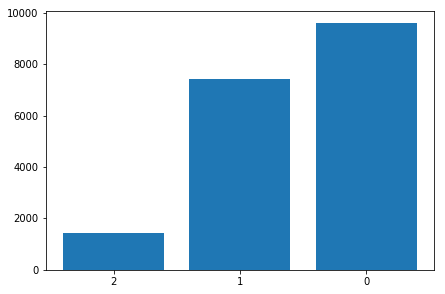

In [7]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [8]:
runs = [(k, len(list(v))) for k, v in itertools.groupby(scb)]

In [9]:
collections.Counter(p[1] for p in runs).most_common()

[(1, 5338),
 (2, 2442),
 (3, 1143),
 (4, 522),
 (5, 253),
 (6, 110),
 (7, 63),
 (8, 29),
 (9, 11),
 (10, 3),
 (14, 1)]

In [11]:
def untri(triplet):
    ds = [int(c) for c in triplet]
    return ds[0] * 9 + ds[1] * 3 + ds[2]

In [12]:
def unpos_t(n):
    if n == 26:
        return '+'
    else:
        return unpos(n + 1)

In [21]:
tb = cat(unpos(untri(t)) for t in chunks(scb, 3))

In [16]:
[c for c in tb if c == '+']

[]

In [36]:
chunks(scb, 28)[:10]

['1110100101000012112210001101',
 '1100101100010111100210110111',
 '1111010110100101011210011100',
 '0010110100000012212221001111',
 '0100100001001102010000011101',
 '1001001011000120021200011010',
 '0001101011100000020021100100',
 '0100110101101100002100001000',
 '0110100000100022001100010110',
 '1011000101100002100111110010']

In [46]:
[every_nth(ch, 7) for ch in chunks(scb, 28)][:10]

[['1110', '1020', '1110', '0011', '1021', '0020', '0011'],
 ['1110', '1011', '0011', '0000', '1101', '0021', '1111'],
 ['1100', '1110', '1001', '1111', '0011', '1020', '0110'],
 ['0111', '0020', '1020', '0011', '1021', '1021', '0021'],
 ['0000', '1020', '0101', '0011', '1001', '0100', '0101'],
 ['1020', '0100', '0101', '1021', '0010', '0021', '1100'],
 ['0001', '0101', '0100', '1120', '1001', '0000', '1020'],
 ['0100', '1000', '0100', '0101', '1020', '1110', '0100'],
 ['0020', '1020', '1001', '0100', '1011', '0011', '0000'],
 ['1101', '0021', '1111', '1100', '0000', '0011', '0010']]

In [31]:
[c[:10] for c in every_nth(scb, 28)]

['1110010001',
 '1110100110',
 '1011000011',
 '0010011001',
 '1101101110',
 '0011000100',
 '0100011000',
 '1111000101',
 '0010011000',
 '1000111101',
 '0010001111',
 '0100000000',
 '0000100100',
 '0110110100',
 '1101020020',
 '2112200022',
 '1102000001',
 '1011122000',
 '2012010210',
 '2222020111',
 '1112002001',
 '0001001001',
 '0100001001',
 '0110110011',
 '1011110100',
 '1111101010',
 '0101010011',
 '1101100000']

In [37]:
[n for n, c in enumerate(scb) if c == '2'][:10]

[15, 18, 19, 47, 75, 99, 100, 102, 103, 104]

In [40]:
pos2s = [[n for n, c in enumerate(ch) if c == '2'] for ch in chunks(scb, 28)]
pos2s[:10]

[[15, 18, 19],
 [19],
 [19],
 [15, 16, 18, 19, 20],
 [15],
 [14, 17, 19],
 [17, 20],
 [18],
 [14, 15],
 [15]]

In [44]:
min(min(s) for s in pos2s if s), max(max(s) for s in pos2s if s)

(14, 20)

In [45]:
def unquad(quadlet):
    ds = [int(c) for c in quadlet]
    return ds[0] * 12 + ds[1] * 6 + ds[2] * 2 + ds[3]

In [48]:
quads = [q for ch in chunks(scb, 28) for q in every_nth(ch, 7)]
quads[:10]

['1110',
 '1020',
 '1110',
 '0011',
 '1021',
 '0020',
 '0011',
 '1110',
 '1011',
 '0011']

In [58]:
qcb = cat(unpos(unquad(q)) for q in quads)
qcb[:100]

'uqudredupdatfvsunvdqijeqdrrfaqhdnghqghrcfsbhgwnaqgmghqugeqngpdatfvsadccnehqghgweqcfufvnemhqghfvsdrhb'

In [51]:
kb, scoreb = simulated_annealing_break(qcb, fitness=Ptrigrams)
kb, scoreb

('noapqrsbfytcuvdwxeghijklmz', -15275.52585516763)

In [52]:
pb = keyword_decipher(qcb, kb, KeywordWrapAlphabet.from_last)
pb

'memofromdockingmanoeuvreofficetoastestflightspacesystemsreasdockingcollartestspreliminarytestingofthedockingcollarsystemhasrevealedapotentiallyseriousflawinthedesignwhichmustbeaddressedbeforethesystemcanbecertifiedtheissueconcernstheemergencyreleasesystembackgroundthedockingsystemperformsthefollowingfunctionsimpactenergyabsorptionmechanicalconnectionspacecraftalignmentandretractionspacecrafthardmechanicalconnectionanddockinginterfacesealingspacecraftundockingandseparationinordertoachievethesefunctionsthedockingsystemconsistsofthreeprinciplepartsthebaseastructuralringandthelatchingringthedockingsystembaseisthemainstructuralmembertowhichthedockingsystemassembliesareattachedthestructuralringcarriesthebodylatcheswhichprovideahardpressuretightconnectionbetweenthetwospacecrafttogetherwiththecapturelatcheswhichoperateduringthedockingmanoeuvretheseperformthedockingfunctiontheyconsistofeightactiveandeightpassivehookswithanelectricaldriveinstalledononeofthelatchesandclosedloopcablesconnectingth

In [53]:
print(lcat(tpack(segment(pb))))

memo from docking manoeuvre office to as test flight space systems re as docking collar tests
preliminary testing of the docking collar system has revealed a potentially serious flaw in the
design which must be addressed before the system can be certified the issue concerns the emergency
release system background the docking system performs the following functions impact energy
absorption mechanical connection spacecraft alignment and retraction spacecraft hard mechanical
connection and docking interface sealing spacecraft undocking and separation in order to achieve
these functions the docking system consists of three principle parts the base a structural ring and
the latching ring the docking system base is the main structural member to which the docking system
assemblies are attached the structural ring carries the body latches which provide a hard pressure
tight connection between the two spacecraft together with the capture latches which operate during
the docking manoeuvre these 

In [55]:
open(plaintext_b_filename, 'w').write(lcat(tpack(segment(pb))))

5494